In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display setup
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset (make sure the CSV file is in the same folder as the notebook)
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [3]:
# Dataset shape and types
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

Shape: (2861, 11)

Data types:
 id             int64
date          object
NH4          float64
BSK5         float64
Suspended    float64
O2           float64
NO3          float64
NO2          float64
SO4          float64
PO4          float64
CL           float64
dtype: object


In [4]:
# Checking shape and data types
print("Dataset shape:", df.shape)
print(df.dtypes)

Dataset shape: (2861, 11)
id             int64
date          object
NH4          float64
BSK5         float64
Suspended    float64
O2           float64
NO3          float64
NO2          float64
SO4          float64
PO4          float64
CL           float64
dtype: object


In [5]:
# Summary statistics
print(df.describe())

                id          NH4         BSK5    Suspended           O2  \
count  2861.000000  2858.000000  2860.000000  2845.000000  2858.000000   
mean     12.397064     0.758734     4.316182    12.931905     9.508902   
std       6.084226     2.486247     2.973997    16.543097     4.428260   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.000000     0.080000     2.160000     6.000000     7.092500   
50%      14.000000     0.220000     3.800000    10.000000     8.995000   
75%      16.000000     0.500000     5.800000    15.000000    11.520000   
max      22.000000    39.427000    50.900000   595.000000    90.000000   

               NO3          NO2          SO4          PO4           CL  
count  2860.000000  2858.000000  2812.000000  2833.000000  2812.000000  
mean      4.316846     0.246128    59.362313     0.418626    93.731991  
std       6.881188     2.182777    96.582641     0.771326   394.512184  
min       0.000000     0.000000     0.000

In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64


In [7]:
# Drop 'id' and 'date' columns as they are not needed for prediction
df = df.drop(['id', 'date'], axis=1)


# Fill missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Confirm again
print("\nMissing values after fill:\n", df.isnull().sum())

df.head()


Missing values after fill:
 NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64


,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [8]:
# Create target based on Oxygen level (arbitrary threshold: 5)
df['Potability'] = df['O2'].apply(lambda x: 1 if x >= 5 else 0)

# Check balance
df['Potability'].value_counts()

Potability
1    2666
0     195
Name: count, dtype: int64

In [9]:
# Features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       535

    accuracy                           1.00       573
   macro avg       1.00      1.00      1.00       573
weighted avg       1.00      1.00      1.00       573



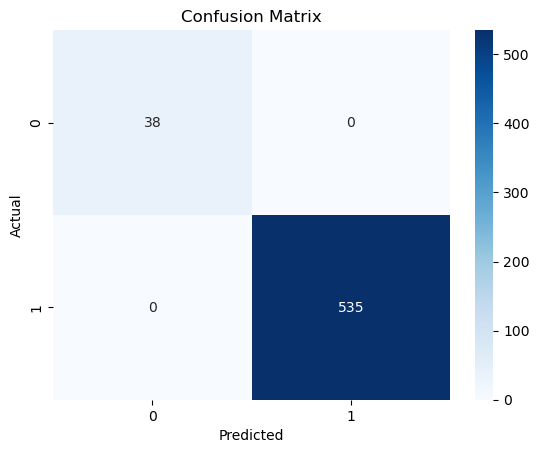

In [11]:
# Accuracy and report
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

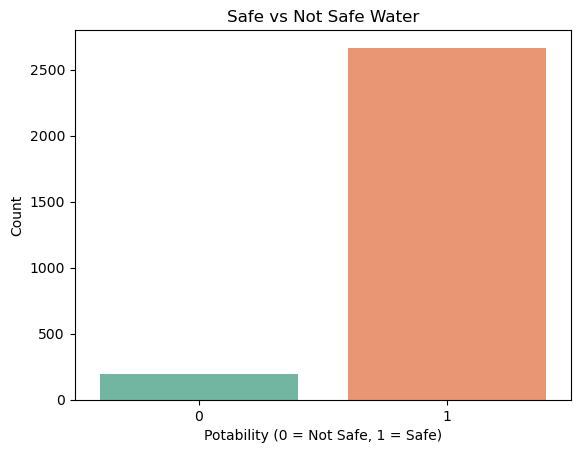

In [12]:
sns.countplot(x='Potability', data=df, palette='Set2')
plt.title("Safe vs Not Safe Water")
plt.xlabel("Potability (0 = Not Safe, 1 = Safe)")
plt.ylabel("Count")
plt.show()

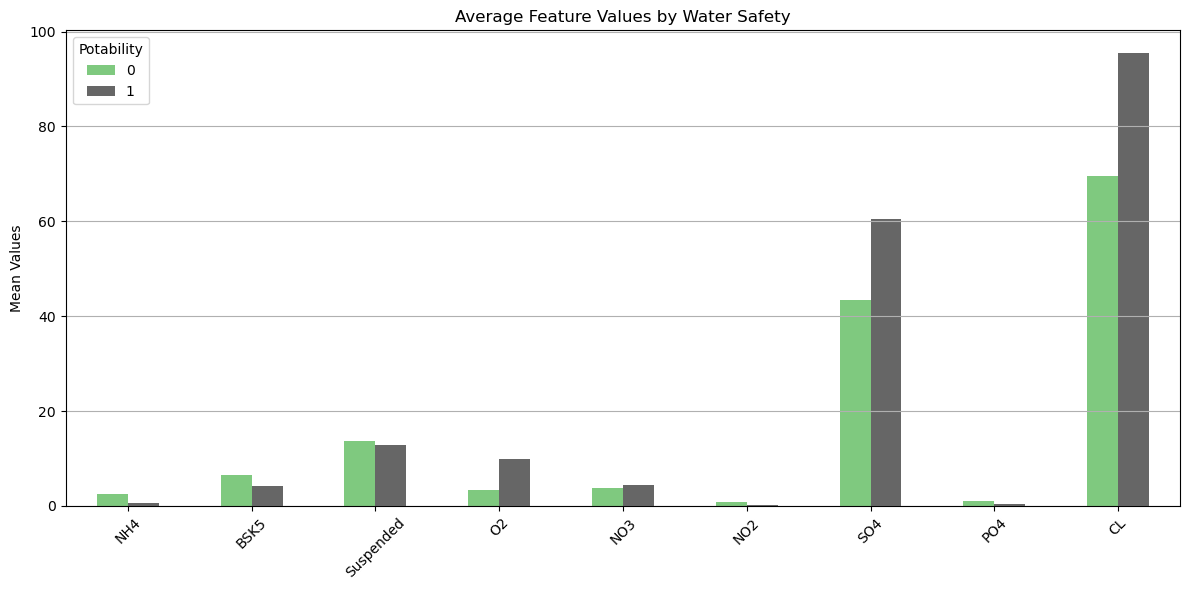

In [13]:
df.groupby('Potability').mean().T.plot(kind='bar', figsize=(12, 6), colormap='Accent')
plt.title("Average Feature Values by Water Safety")
plt.ylabel("Mean Values")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

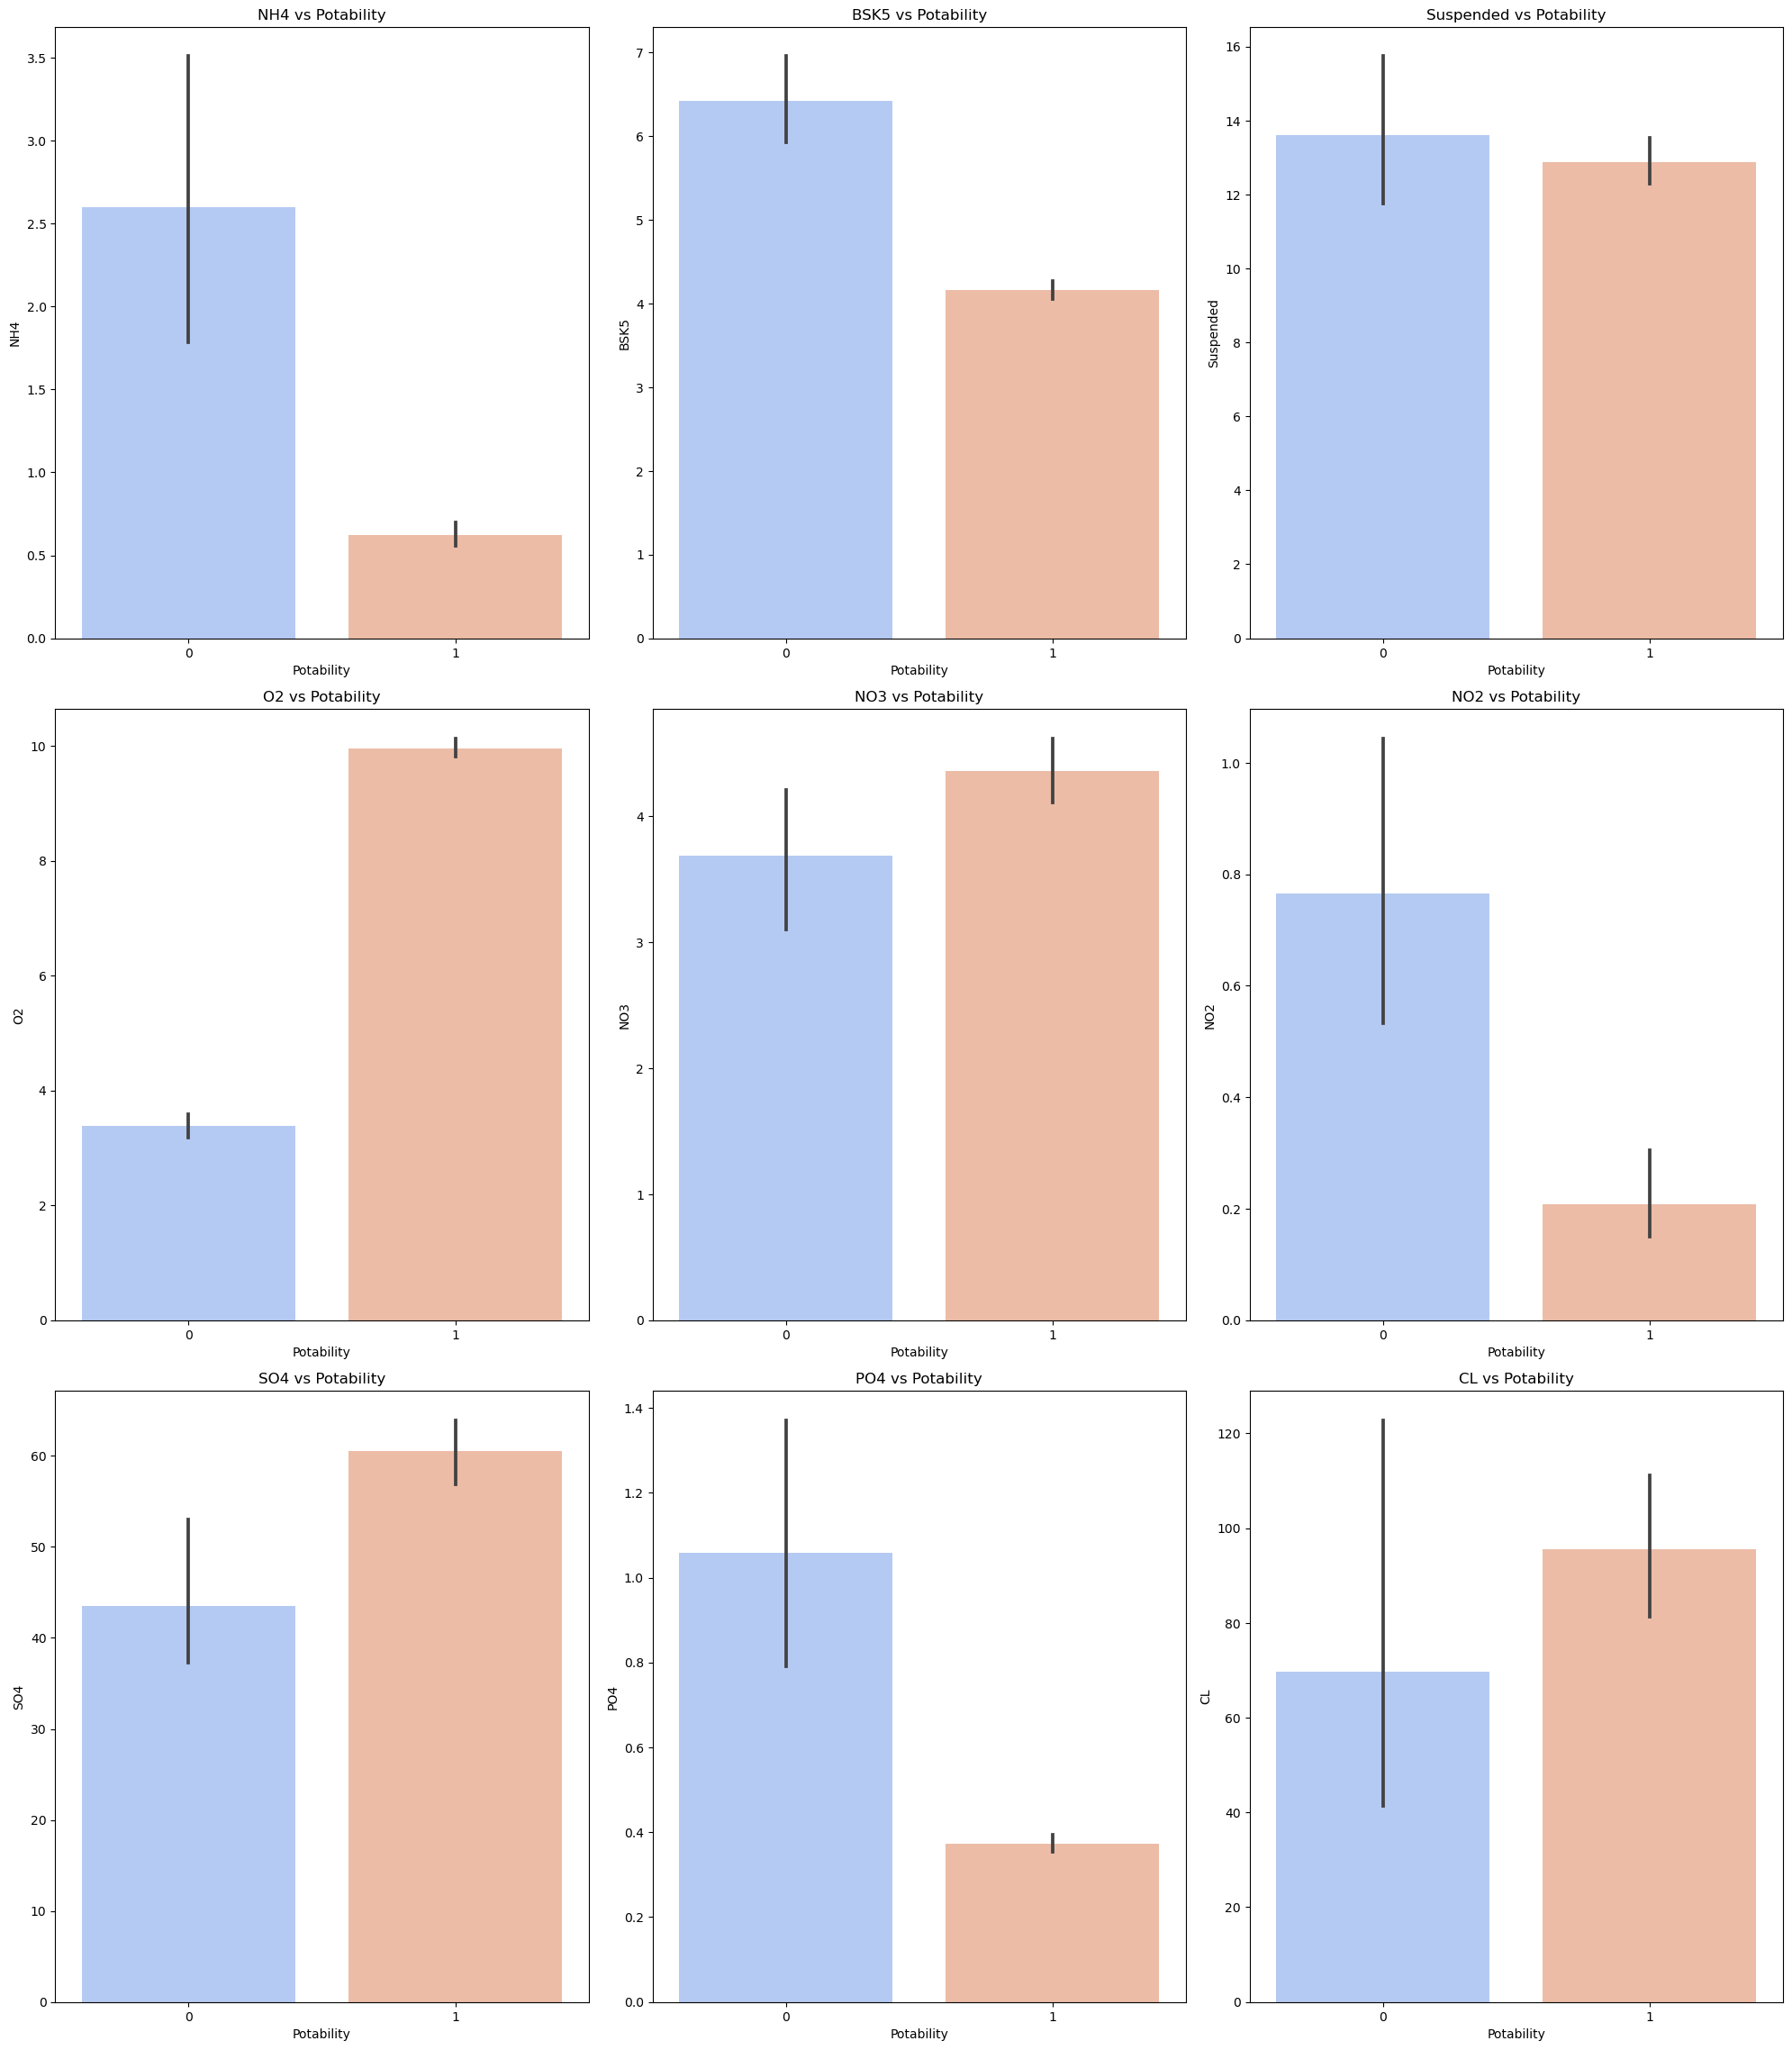

In [14]:
features = df.columns.drop('Potability')
plt.figure(figsize=(20, 30))
for i, col in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.barplot(x='Potability', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Potability')
    plt.tight_layout()
plt.show()

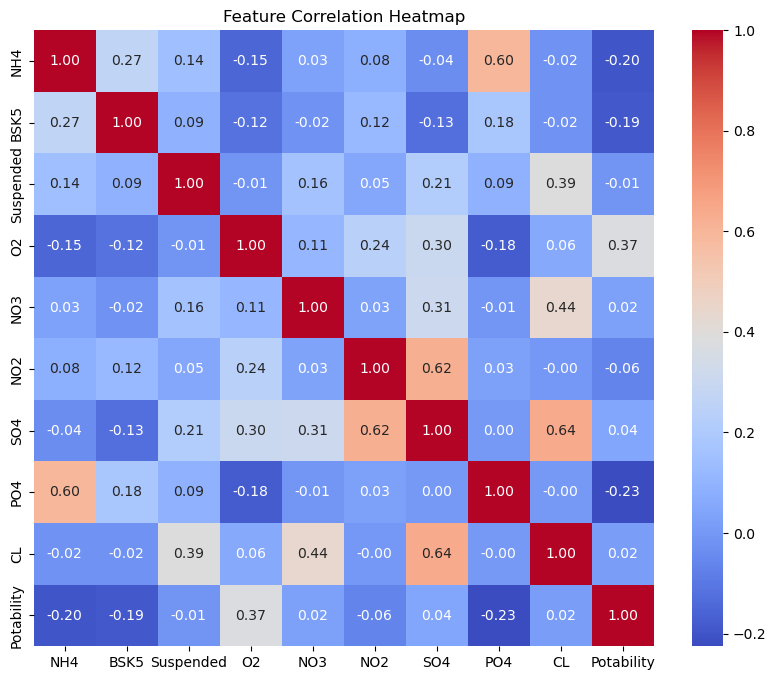

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Example input (adjust according to your dataset feature order)
sample = np.array([[0.2, 3.1, 15, 6.5, 12, 0.02, 100, 0.05, 30]])
sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
print("Prediction:", "Safe" if prediction[0] == 1 else "Not Safe")

Prediction: Safe


In [17]:
# Example: Ratios and interactions
df['NO3/NO2'] = df['NO3'] / (df['NO2'] + 0.001)
df['NH4+NO2'] = df['NH4'] + df['NO2']
df['O2_per_Suspended'] = df['O2'] / (df['Suspended'] + 0.01)

In [18]:
from scipy import stats

# Remove rows with extreme outliers
df_clean = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    acc = clf.score(X_test_scaled, y_test)
    print(f"{name} Accuracy: {acc:.2f}")

RandomForest Accuracy: 1.00
LogisticRegression Accuracy: 1.00
SVM Accuracy: 0.98
KNN Accuracy: 0.96


In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': None, 'n_estimators': 50}


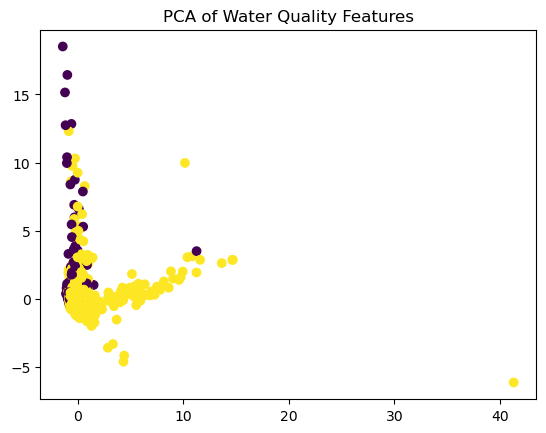

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title("PCA of Water Quality Features")
plt.show()

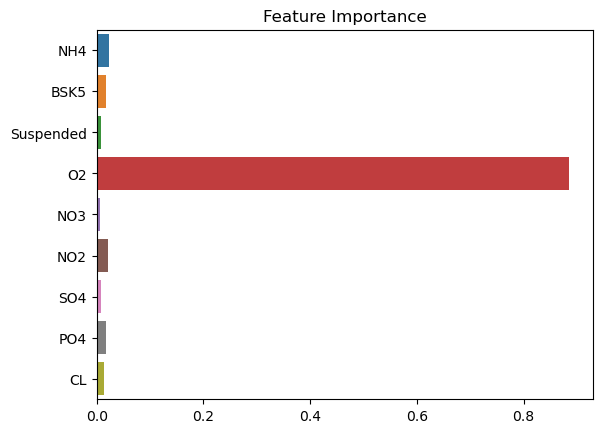

In [22]:
importances = model.feature_importances_
feat_names = X.columns

sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.show()

In [23]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


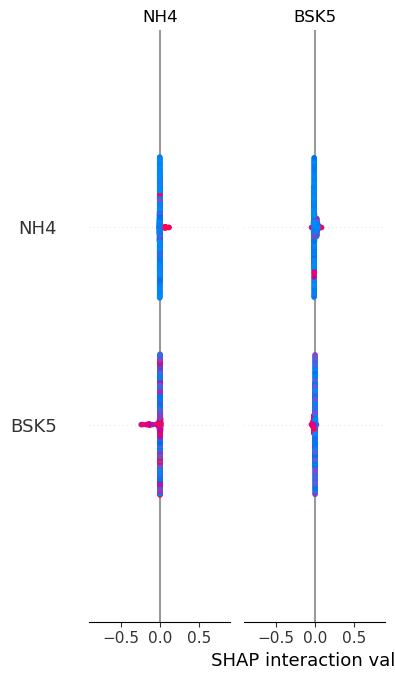

In [24]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [25]:
import joblib
joblib.dump(model, "water_quality_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [26]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [27]:
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load("water_quality_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("💧 Water Quality Predictor")
st.markdown("Enter parameters to predict whether water is safe.")

# Input features
features = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
user_input = []

for feat in features:
    val = st.number_input(f"{feat}:", step=0.1)
    user_input.append(val)

# Predict button
if st.button("Predict"):
    input_scaled = scaler.transform([user_input])
    result = model.predict(input_scaled)[0]
    if result == 1:
        st.success("✅ Water is Safe to Drink")
    else:
        st.error("❌ Water is NOT Safe")

2025-06-19 11:29:43.182 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 11:29:44.050 
  command:

    streamlit run C:\Users\Loganaadhan\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-19 11:29:44.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 11:29:44.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 11:29:44.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 11:29:44.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 11:29:44.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 11:29:44.054 Thread 'MainThrea

In [52]:
import joblib
joblib.dump(model, "water_quality_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [28]:
import shutil

shutil.move("water_quality_model.pkl", r"C:\water_project\water_quality_model.pkl")
shutil.move("scaler.pkl", r"C:\water_project\scaler.pkl")

'C:\\water_project\\scaler.pkl'

In [29]:
model = joblib.load(r"C:\water_project\water_quality_model.pkl")
scaler = joblib.load(r"C:\water_project\scaler.pkl")

In [30]:
# Example input (adjust according to your dataset feature order)
sample = np.array([[0.2, 3.1, 15, 6.5, 12, 0.02, 100, 0.05, 30]])
sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
print("Prediction:", "Safe" if prediction[0] == 1 else "Not Safe")

Prediction: Safe
